# Task 4: Chaotic dynamics


## Part 2: Lorenz attraction 



<a href="https://www.codecogs.com/eqnedit.php?latex=\begin{equation}&space;\dot{x}&space;&=&space;\sigma(x-y)&space;\\&space;\dot{y}&space;&=&space;x(\rho&space;-&space;z)&space;-&space;y&space;\\&space;\dot{z}&space;&=&space;xy&space;-&space;\beta&space;z&space;\end{equation}" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\begin{equation}&space;\dot{x}&space;&=&space;\sigma(x-y)&space;\\&space;\dot{y}&space;&=&space;x(\rho&space;-&space;z)&space;-&space;y&space;\\&space;\dot{z}&space;&=&space;xy&space;-&space;\beta&space;z&space;\end{equation}" title="\begin{equation} \dot{x} &= \sigma(x-y) \\ \dot{y} &= x(\rho - z) - y \\ \dot{z} &= xy - \beta z \end{equation}" /></a>

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

import sw.task4 as t4
from sw.utils.plot_utils import three_d_orbit

In [ ]:
dt = 0.01
num_steps = 10000

# System parameters 
sigma = 10
beta = 8/3 
rho = 28

## Orbit plot for P0  = (10,10,10)

In [ ]:
x_path = np.empty(num_steps + 1)
y_path = np.empty(num_steps + 1)
z_path = np.empty(num_steps + 1)

# Initial values
x_path[0], y_path[0], z_path[0] = (10., 10., 10.)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = t4.lorenz(x_path[i], y_path[i], z_path[i],sigma, rho, beta)
    x_path[i + 1] = x_path[i] + (x_dot * dt)
    y_path[i + 1] = y_path[i] + (y_dot * dt)
    z_path[i + 1] = z_path[i] + (z_dot * dt)

In [ ]:
three_d_orbit(x_path,y_path,z_path)

## Orbit plot for P' = P0 + (10^-8,0,0)

In [ ]:
x_hat_path = np.empty(num_steps + 1)
y_hat_path = np.empty(num_steps + 1)
z_hat_path = np.empty(num_steps + 1)

# Initial values:
x_hat_path[0], y_hat_path[0], z_hat_path[0] = (10.+10**-8.,10.,10.)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = t4.lorenz(x_hat_path[i], y_hat_path[i], z_hat_path[i],sigma, rho, beta)
    x_hat_path[i + 1] = x_hat_path[i] + (x_dot * dt)
    y_hat_path[i + 1] = y_hat_path[i] + (y_dot * dt)
    z_hat_path[i + 1] = z_hat_path[i] + (z_dot * dt)

In [ ]:
three_d_orbit(x_hat_path,y_hat_path,z_hat_path)

## Plot the difference: 

<img src="https://latex.codecogs.com/svg.latex?e&space;=&space;||x-\hat{x}||^2" title="e = ||x-\hat{x}||^2" />

In [ ]:
xlabel = 'T'
diff = np.empty(num_steps+1)

In [ ]:
for i in range(num_steps+1):
    e = np.array([x_path[i], y_path[i], z_path[i]])
    e_hat= np.array([x_hat_path[i], y_hat_path[i], z_hat_path[i]])
    dist = np.linalg.norm(e-e_hat)
    dist *=dist 
    diff[i]=dist

ylabel = '$||x-\hat{x}||^2$'
t4.plot_difference(dt,num_steps,diff,xlabel,ylabel)

## Plot the logaritmic difference: 
<img src="https://latex.codecogs.com/svg.latex?e&space;=&space;ln(||x-\hat{x}||^2)" title="e = ln(||x-\hat{x}||^2)" />

In [ ]:
ylabel = '$log(||x-\hat{x}||^2)$'
diff = np.log(diff)
t4.plot_difference(dt,num_steps,diff,xlabel,ylabel)

## Plot orbit in R^3 for P0

In [ ]:
rho = 0.5
x_path = np.empty(num_steps + 1)
y_path = np.empty(num_steps + 1)
z_path = np.empty(num_steps + 1)

# Initial values:
x_path[0], y_path[0], z_path[0] = (10., 10., 10.)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = t4.lorenz(x_path[i], y_path[i], z_path[i],sigma, rho, beta)
    x_path[i + 1] = x_path[i] + (x_dot * dt)
    y_path[i + 1] = y_path[i] + (y_dot * dt)
    z_path[i + 1] = z_path[i] + (z_dot * dt)
    
print(z_path[-1])

three_d_orbit(x_path, y_path, z_path, lw=3)

## Plot orbit in R^3 for P'

In [ ]:
rho=0.5

x_hat_path = np.empty(num_steps + 1)
y_hat_path = np.empty(num_steps + 1)
z_hat_path = np.empty(num_steps + 1)

# Initial values:
x_hat_path[0], y_hat_path[0], z_hat_path[0] = (10.+10**-8.,10.,10.)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = t4.lorenz(x_hat_path[i], y_hat_path[i], z_hat_path[i],sigma, rho, beta)
    x_hat_path[i + 1] = x_hat_path[i] + (x_dot * dt)
    y_hat_path[i + 1] = y_hat_path[i] + (y_dot * dt)
    z_hat_path[i + 1] = z_hat_path[i] + (z_dot * dt)

three_d_orbit(x_path, y_path, z_path, lw=3)

### Bifurcation plot

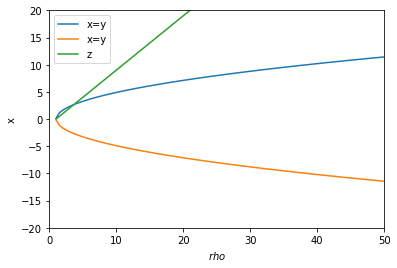

In [2]:
rho = np.linspace(0,50,100)
beta = 8/3

x_pos,x_neg,z = t4.lorenz_equilibrium(rho,beta)
t4.plot_equilibria(rho,x_pos,x_neg,z)